<a href="https://colab.research.google.com/github/NITIN9694/TensorFlow-Learning/blob/main/05_Transfer_Learning_In_Tensor_flow_(Feature_extraction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###What is transfer learning?

Surely someone has time spent the time crafting the right model for the job (
  someone has probaly already created some sort of nerual network that work atleast somewhat with the problem that your working on.
)

ex: CNN (imagenet :- a big data set for diffrent image se) https://www.image-net.org/index.php

Natural Lanuage Processing

###Why use transfer learning?

We can use an existing neural network design that’s already known to work well for a problem similar to ours.

We can use a network that has already learned useful patterns from similar data, instead of starting training from scratch.

In short: Reuse a proven model and its learned knowledge for our own similar task — this is basically transfer learning.



In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

#unzip download file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2025-08-28 08:27:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.207, 74.125.69.207, 64.233.181.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   148MB/s    in 1.1s    

2025-08-28 08:27:33 (148 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
import os

#walk through the 10 percent data
for dirpath , dirname , filename in os.walk("10_food_classes_10_percent"):
  print(f"there  are ${len(dirname)} directories and file ${len(filename)}image ${dirpath}")


there  are $2 directories and file $0image $10_food_classes_10_percent
there  are $10 directories and file $0image $10_food_classes_10_percent/test
there  are $0 directories and file $250image $10_food_classes_10_percent/test/chicken_curry
there  are $0 directories and file $250image $10_food_classes_10_percent/test/sushi
there  are $0 directories and file $250image $10_food_classes_10_percent/test/ice_cream
there  are $0 directories and file $250image $10_food_classes_10_percent/test/fried_rice
there  are $0 directories and file $250image $10_food_classes_10_percent/test/chicken_wings
there  are $0 directories and file $250image $10_food_classes_10_percent/test/pizza
there  are $0 directories and file $250image $10_food_classes_10_percent/test/grilled_salmon
there  are $0 directories and file $250image $10_food_classes_10_percent/test/steak
there  are $0 directories and file $250image $10_food_classes_10_percent/test/hamburger
there  are $0 directories and file $250image $10_food_clas

###Creating Data Loaders(Preparing the data)



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"

test_dir = "10_food_classes_10_percent/test/"


train_data_gen = ImageDataGenerator(rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)

print("train data imge")

train_data_10_image = train_data_gen.flow_from_directory(train_dir,
                                                         target_size=IMAGE_SHAPE,
                                                         batch_size=BATCH_SIZE,
                                                         class_mode = "categorical"
                                                         )

print("test data image")

test_data_10_image = test_data_gen.flow_from_directory(test_dir,
                                                      target_size=IMAGE_SHAPE,
                                                         batch_size=BATCH_SIZE,
                                                         class_mode = "categorical"
                                                       )

train data imge
Found 750 images belonging to 10 classes.
test data image
Found 2500 images belonging to 10 classes.


## Setting up callbacks
Call backs  are  extra funcationality you can add to your model tobe perfomed during and after training. Some of the most popular callbacks are:

* Training experiments with the TensorBoard Callbacks
*  Model checkpoint with Model Checkpoints Callbacks
*  Stoping a model from training (Before it trains too long and overfits) with the earlyshoping callbacks



In [ ]:
#creat tensorboard callback
import datetime

def create_tensorboard_callback(dir_name,experiment_name):
 log_dir = dir_name + "/"+ experiment_name+"/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
 tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir )
 print(f"Saving Tensorboard log files to: {log_dir}")
 return tensorboard_callback



##Creating model using tesorflow hub

 In the past we've used Tensorflow to create own model layers by layer from scracth.
 Now we're going to do similar process, except the mjority of our model's layers are going to come from TensorFlow Hub.
 We can Access Pretrain model on : https://tfhub.dev/

In [ ]:
#LET's compare the following two models

resnet_url =    "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficient_url = "https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-classification/1"





In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import  layers


In [ ]:
#let make a create_model() function to create a model from a url

IMAGE_SHAPE = (224, 224)  # adjust to match the hub model requirement

def create_model(model_url, num_classes):
    """
    Creates a Keras model using a feature extractor from TensorFlow Hub.

    Args:
        model_url (str): TensorFlow Hub feature extraction model URL.
        num_classes (int): Number of output classes.

    Returns:
        tf.keras.Model: An uncompiled Keras model.
    """
    # Input layer
    inputs = tf.keras.Input(shape=IMAGE_SHAPE + (3,), name="input_image")

    # Feature extractor from TF Hub wrapped in a Lambda layer
    feature_extractor_layer = hub.KerasLayer(
        model_url,
        trainable=False,
        name="feature_extraction_layer"
    )

    x = tf.keras.layers.Lambda(lambda z: feature_extractor_layer(z))(inputs)
    outputs = layers.Dense(num_classes, activation="softmax", name="output_layer")(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="hub_feature_model")

    return model

###Create and testing Reset Tensor Flow Hub Feature Extrcation Model

In [ ]:
 #Create ReNet model
resnet_model = create_model(resnet_url,train_data_10_image.num_classes)

In [ ]:
resnet_model.summary()

Model: "hub_feature_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_1 (Lambda)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,490 (80.04 KB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"]
                     )

In [ ]:
##LETS fit our resent model to the data
resnet_history = resnet_model.fit(train_data_10_image,
                                  epochs=5,
                                  steps_per_epoch = len(train_data_10_image),
                                  validation_data = test_data_10_image,
                                  validation_steps = int(0.25*len(test_data_10_image)),
                                  callbacks = [create_tensorboard_callback(dir_name="tensorhub",experiment_name="resnet50V2")]
                                  )

Saving Tensorboard log files to: tensorhub/resnet50V2/20250828-082741


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 200s 8s/step - accuracy: 0.2140 - loss: 2.4227 - val_accuracy: 0.6036 - val_loss: 1.2153
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 194s 8s/step - accuracy: 0.7249 - loss: 0.9873 - val_accuracy: 0.7270 - val_loss: 0.8508
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 201s 8s/step - accuracy: 0.8208 - loss: 0.6465 - val_accuracy: 0.7500 - val_loss: 0.7703
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 203s 8s/step - accuracy: 0.8719 - loss: 0.4869 - val_accuracy: 0.7516 - val_loss: 0.7350
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 180s 8s/step - accuracy: 0.9021 - loss: 0.4110 - val_accuracy: 0.7862 - val_loss: 0.6447


Our Transfer learning feature extractor model out perfromed All Of the previous models we built by hand.. (Substantially) and in a quicker training time and with only 10% of the training examples

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curve(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot the curve
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.plot(epochs,accuracy,label="Accuracy")
  plt.plot(epochs,val_accuracy,label="val_Accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()


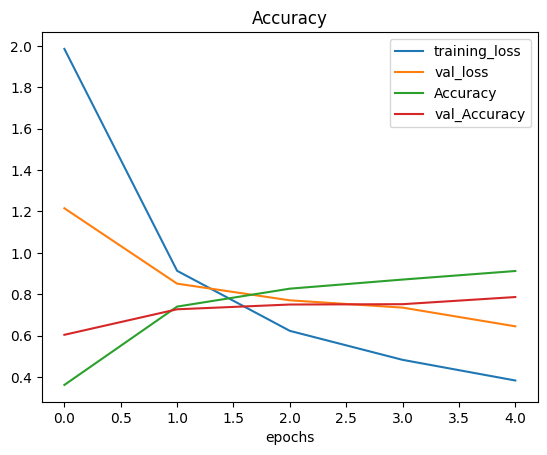

In [ ]:
plot_loss_curve(resnet_history)

###Creating and testing EffcientNetB0 Tensorflow Hub Feature Extraction Model

In [ ]:
 #Create ReNet model
efficent_model =resnet_model = create_model(efficient_url,train_data_10_image.num_classes)

#compile
efficent_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"]
                     )

In [ ]:
efficent_history = efficent_model.fit(train_data_10_image,
                                      epochs = 5,
                                      steps_per_epoch = len(train_data_10_image),
                                      validation_data = test_data_10_image,
                                      validation_steps= int(0.25*len(test_data_10_image)),
                                      callbacks = [create_tensorboard_callback(dir_name="tensorhub",experiment_name="=efficent")]
                                      )

Saving Tensorboard log files to: tensorhub/=efficent/20250828-085428
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.5761 - loss: 2.2270 - val_accuracy: 0.5609 - val_loss: 2.2157
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.5941 - loss: 2.2139 - val_accuracy: 0.6201 - val_loss: 2.2009
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.6154 - loss: 2.2003 - val_accuracy: 0.6201 - val_loss: 2.1866
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.6250 - loss: 2.1837 - val_accuracy: 0.6053 - val_loss: 2.1726
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.6561 - loss: 2.1707 - val_accuracy: 0.6809 - val_loss: 2.1516


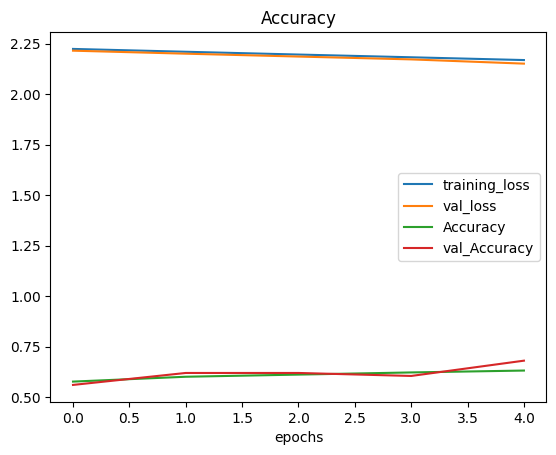

In [ ]:
plot_loss_curve(efficent_history)

In [ ]:
efficent_model.summary()

Model: "hub_feature_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_2 (Lambda)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,032 (117.32 KB)

 Trainable params: 10,010 (39.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,022 (78.21 KB)

## Diffrent types of transer learning

* **"As is" trasnfer learning** an existing model with no changes what so ever(eg. using imagenet model on 1000 Image Net Classes none of your own)

*  **"Feature Extraction" Transfer learning** - use the prelearned pattern of an existing model (eg EficientNetB0 trained on imagent ) and adjust the output layer for your own problem
*  **"Fine Tuning" Transfer learning** - use the prelearned pattern of an existing model and fine-tune  many or all of the underlying layers

In [ ]:
len(resnet_model.layers[0].weights)

0

###Comparing model result using tensorflow

In [ ]:
#upload tensorboard dev recoard
!tensorboard dev upload --logdir ./tensorhub/ --name "Efficenet vs ResNet" --description "comparing two different TF hub feature"

/usr/local/lib/python3.12/dist-packages/tensorboard/_vendor/bleach/sanitizer.py:292: SyntaxWarning: invalid escape sequence '\s'
  "[`\000-\040\177-\240\s]+",
/usr/local/lib/python3.12/dist-packages/tensorboard/_vendor/bleach/sanitizer.py:339: SyntaxWarning: invalid escape sequence '\s'
  style = re.compile('url\s*\(\s*[^\s)]+?\s*\)\s*').sub(' ', style)
/usr/local/lib/python3.12/dist-packages/tensorboard/_vendor/bleach/sanitizer.py:354: SyntaxWarning: invalid escape sequence '\s'
  if not re.match("^\s*([-\w]+\s*:[^:;]*(;\s*|$))*$", style):
/usr/local/lib/python3.12/dist-packages/tensorboard/_vendor/bleach/sanitizer.py:358: SyntaxWarning: invalid escape sequence '\w'
  for prop, value in re.findall('([-\w]+)\s*:\s*([^:;]*)', style):
2025-08-28 09:23:18.614251: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756372998.663068   47751 cuda_dnn.

ModuleNotFoundError: No module named 'wandb.keras'